This Project was completed by **Alron Harry**, **Olayemi Ogirimah**, & **Rhaine Williams** for the CS 595A - Artificial Intelligence Final Project at Embry-Riddle Aeronautical University-Daytona Beach. 

Professor: **Kenji Yoshigoe**

In [145]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [2]:
#Function to:
# 1. Reduce the Resolution of Image from 1200 x 900 to 45 x 34
# 2. Convert the Image from colored to Black & White (Removing the Third Dimension of the Image)
# 3. Saving the new Images in a separate folder which can be accessed independently later on &
# 4. Saving the reduced quality images in a single variable for easier Analysis

def modify_image(folder):
    images = []                                   #The variable for the new images to be placed in
    new_folder = r"C:\Users\alron\Downloads\CS 595A\FINAL PROJECT\Images_new" #This is the file path for the new images to be stored (should be replaced based on where you want to have the files stored)
    
    for filename in os.listdir(folder):
        image = Image.open(os.path.join(folder,filename))  #Opening the images from the original folder
        new_image = image.convert("L")                     #Converting from Color to B&W Images
        neww_image = new_image.resize((45, 34))            #Reducing the Resolution of Image from 1200 x 900 to 45 x 34
        #neww_image.save(os.path.join(new_folder,filename)) #Saving the edited images in the new folder (Optional)
        if img is not None:
            images.append(neww_image)                      #Placing the new images in the variable for analysis
    return images


In [3]:
pictures = modify_image(r"C:\Users\alron\Downloads\CS 595A\FINAL PROJECT\Captial Letters") #Calling the above function and saving the new images (path should be replaced based on where you have the files stored) 

In [4]:
len(pictures)

1430

## Preparing the Features

In [5]:
#Checking the data type of the images after being uploaded with the function above
type(pictures[0])

PIL.Image.Image

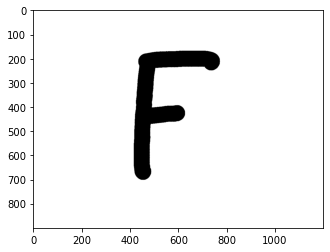

In [134]:
#Visualizing an example of one of the pictures BEFORE modification

img = Image.open(r"C:\Users\alron\Downloads\CS 595A\FINAL PROJECT\Captial Letters\img016-026.png")
plt.imshow(img)

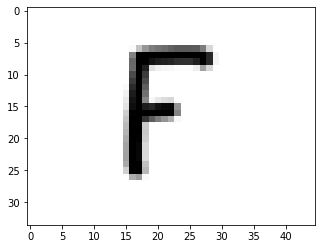

In [137]:
#Visualizing an example of one of the pictures AFTER modification

img = Image.open(r"C:\Users\alron\Downloads\CS 595A\FINAL PROJECT\Images_new\img016-026.png")
plt.imshow(img,cmap='gray')

In [6]:
#Converting the Pictures from PIL Images to Arrays for easier Data Analysis

#Converting from PIL Image to List
images1 = []
for i in range(len(pictures)):
    pix = np.array(pictures[i])
    images1.append(pix)

In [7]:
images1

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

In [8]:
#Converting from List to Array
image_array = np.array(images1)
image_array

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       ...,

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255

In [9]:
#Checking to make sure if an image array was flattened then it would have (45 x 34 = 1530) features
len(image_array[0].flatten())

1530

In [10]:
#Creating a FLATTENED array for all samples where each column will be represented by the pixels (features) of the images 

#Creating List to store flattened arrays
pixels=[]
for j in range(len(image_array)):
    all_pix = image_array[j].flatten()
    pixels.append(all_pix)

In [11]:
#Converting that List to an Array
final_features = np.array(pixels)
final_features

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [12]:
#Checking the shape of the array
final_features.shape  

(1430, 1530)

This shape implies that there are 1530 (45x34) features, and 1430 samples. 

## Preparing the Data Labels 

In [13]:
#Importing the Data Labels from a csv file
data = np.array(pd.read_csv(r"C:\Users\alron\Downloads\CS 595A\FINAL PROJECT\capitallabels.csv"))

#Checking the length of the variable to ensure that it matches the amount of samples (1430)
len(data)

1430

In [14]:
# Converting the data labels to a list so that we can check the distribution of each class via the value_counts() function 

data_labels = data.tolist()

In [15]:
count_values=pd.Series(data_labels).value_counts()
print(count_values)

[A]    55
[B]    55
[Y]    55
[X]    55
[W]    55
[V]    55
[U]    55
[T]    55
[S]    55
[R]    55
[Q]    55
[P]    55
[O]    55
[N]    55
[M]    55
[L]    55
[K]    55
[J]    55
[I]    55
[H]    55
[G]    55
[F]    55
[E]    55
[D]    55
[C]    55
[Z]    55
dtype: int64


In [16]:
#Changing the shape of the data labels from (1430,1) to (1430,) as a part of preparing the data for the ML algorithm

final_labels=data.squeeze()
final_labels.shape

(1430,)

## Data Preprocessing

**Splitting up into Training (80%) & Testing Data (20%):**

The stratify option was used to ensure that in the training and testing sets, there were a balanced number of  samples from all the possible classes. 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(final_features, final_labels, stratify = final_labels, test_size=0.2, random_state=42)

**Normalizing the Data using the MinMaxScaler():**

In [18]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The minimum accuracy that is expected for each of the classifiers to be considered a valid classifier is (55/1430) x 100 = **3.846%** 

For simplicity, the following models (Logistic Regression, Random Forest Classifier & KNN Classifier) will be trained, tested and optimized using accuracy as the **ONLY** performance metric. However, after the model is optimized, other metrics will be computed to assess the optimized model's performance.

## Fitting the Logistic Regression Algorithm (All Default Values)

In [19]:
log = LogisticRegression(random_state=42).fit(X_train, y_train)

C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Testing Accuracy without any Optimization:**

In [20]:
# Predicting on the testing (unseen) data using the model developed on the training data

logistic_predictions_test = log.predict(X_test)
print(logistic_predictions_test)

['L' 'N' 'W' 'V' 'H' 'J' 'M' 'L' 'I' 'X' 'A' 'T' 'O' 'M' 'G' 'G' 'P' 'F'
 'Q' 'T' 'W' 'E' 'Z' 'L' 'G' 'W' 'A' 'Q' 'J' 'V' 'P' 'Z' 'Z' 'L' 'L' 'D'
 'S' 'R' 'X' 'F' 'D' 'J' 'R' 'N' 'I' 'I' 'E' 'W' 'V' 'F' 'A' 'N' 'J' 'G'
 'B' 'X' 'L' 'T' 'V' 'R' 'G' 'C' 'O' 'O' 'P' 'S' 'L' 'H' 'G' 'X' 'H' 'G'
 'J' 'A' 'H' 'H' 'Q' 'X' 'M' 'P' 'W' 'W' 'K' 'C' 'Q' 'L' 'W' 'E' 'W' 'V'
 'S' 'K' 'X' 'I' 'P' 'P' 'J' 'R' 'V' 'R' 'Y' 'R' 'H' 'F' 'T' 'J' 'S' 'E'
 'L' 'Q' 'Y' 'Y' 'D' 'P' 'J' 'R' 'O' 'V' 'H' 'M' 'R' 'F' 'T' 'I' 'I' 'G'
 'X' 'X' 'O' 'E' 'A' 'P' 'T' 'W' 'K' 'C' 'N' 'O' 'L' 'O' 'Y' 'Z' 'P' 'G'
 'Y' 'G' 'K' 'S' 'S' 'D' 'V' 'E' 'F' 'T' 'Z' 'N' 'S' 'B' 'M' 'O' 'T' 'X'
 'T' 'R' 'J' 'P' 'F' 'T' 'L' 'R' 'X' 'Q' 'C' 'G' 'M' 'J' 'W' 'F' 'U' 'K'
 'J' 'J' 'G' 'C' 'O' 'T' 'S' 'X' 'A' 'O' 'I' 'Y' 'R' 'Z' 'S' 'D' 'H' 'V'
 'F' 'U' 'C' 'Q' 'S' 'A' 'K' 'C' 'I' 'V' 'I' 'G' 'W' 'S' 'Q' 'M' 'J' 'B'
 'F' 'L' 'G' 'F' 'O' 'D' 'P' 'B' 'D' 'J' 'U' 'V' 'L' 'X' 'R' 'K' 'K' 'P'
 'O' 'C' 'F' 'T' 'F' 'O' 'M' 'K' 'Y' 'C' 'Y' 'F' 'N

In [21]:
print(y_test)

['W' 'N' 'W' 'V' 'H' 'J' 'M' 'E' 'S' 'S' 'H' 'Y' 'Z' 'M' 'O' 'G' 'Z' 'F'
 'Q' 'R' 'W' 'G' 'D' 'L' 'Q' 'G' 'A' 'Z' 'J' 'V' 'M' 'R' 'Z' 'I' 'I' 'D'
 'S' 'R' 'X' 'R' 'D' 'T' 'E' 'W' 'A' 'I' 'I' 'W' 'H' 'F' 'A' 'D' 'J' 'G'
 'B' 'Y' 'L' 'T' 'V' 'R' 'G' 'C' 'O' 'D' 'D' 'S' 'Z' 'U' 'S' 'X' 'F' 'G'
 'B' 'A' 'H' 'H' 'Z' 'X' 'N' 'P' 'K' 'N' 'O' 'C' 'W' 'L' 'W' 'E' 'W' 'U'
 'S' 'K' 'E' 'E' 'P' 'P' 'J' 'R' 'V' 'G' 'V' 'R' 'H' 'F' 'Y' 'J' 'V' 'F'
 'C' 'Q' 'H' 'Y' 'D' 'Q' 'Z' 'K' 'E' 'W' 'H' 'M' 'R' 'P' 'T' 'I' 'L' 'G'
 'X' 'W' 'O' 'F' 'A' 'Z' 'J' 'N' 'D' 'C' 'N' 'Y' 'L' 'Q' 'Y' 'J' 'F' 'G'
 'Y' 'G' 'B' 'O' 'K' 'B' 'U' 'E' 'F' 'I' 'Z' 'M' 'S' 'K' 'F' 'O' 'T' 'V'
 'T' 'X' 'I' 'P' 'F' 'T' 'L' 'R' 'A' 'Q' 'L' 'G' 'N' 'J' 'W' 'X' 'L' 'C'
 'Z' 'J' 'U' 'C' 'O' 'C' 'B' 'K' 'A' 'Q' 'I' 'R' 'O' 'P' 'S' 'D' 'H' 'V'
 'I' 'E' 'C' 'Q' 'S' 'A' 'B' 'C' 'I' 'V' 'I' 'N' 'H' 'S' 'N' 'M' 'J' 'E'
 'Y' 'L' 'U' 'M' 'U' 'B' 'P' 'B' 'D' 'Y' 'U' 'V' 'L' 'U' 'X' 'K' 'K' 'P'
 'Q' 'C' 'P' 'T' 'T' 'O' 'B' 'K' 'Y' 'L' 'Y' 'F' 'V

In [172]:
logistic_accuracy_test = accuracy_score(y_test, logistic_predictions_test)
logistic_accuracy_test*100

53.84615384615385

**Training Accuracy without any Optimization:**

In [23]:
# Predicting on the testing (unseen) data using the model developed on the training data

logistic_predictions_train = log.predict(X_train)
print(logistic_predictions_train)

['C' 'J' 'P' ... 'I' 'V' 'R']


In [24]:
print(y_train)

['C' 'J' 'P' ... 'I' 'V' 'R']


In [171]:
logistic_accuracy_train = accuracy_score(y_train, logistic_predictions_train)
logistic_accuracy_train*100

97.63986013986013

## Hyperparamater Tuning & K-Fold Cross-Validation to Optimize Algorithm:

In [55]:
# Creating a set of variables to be tested in all their possible combinations to see which combination produces the best ACCURACY

param_grid = [{'penalty':['none','l2'],'C':[0.001, 0.1,1,5],'solver':['lbfgs', 'newton-cg', 'sag'], 'max_iter':[10000],'multi_class':['multinomial']}]

In [56]:
# Initializing the base model. Random state was used for reproducibility and n_jobs=-1 was used to apply parallel processing.

log_opt = LogisticRegression(n_jobs = -1, random_state=42)

In [57]:
# Applying the GridSearchCV with the base model and the parameters from above while using K-fold cross validation with 5 folds

log_GridSearchCV = GridSearchCV(log_opt, param_grid, scoring = 'accuracy',verbose = 8, cv = 5)

In [58]:
#Creation of the model

log_GridSearchCV.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.001, max_iter=10000, multi_class=multinomial, penalty=none, solver=lbfgs;, score=0.485 total time=   6.5s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.001, max_iter=10000, multi_class=multinomial, penalty=none, solver=lbfgs;, score=0.493 total time=   4.6s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.001, max_iter=10000, multi_class=multinomial, penalty=none, solver=lbfgs;, score=0.485 total time=   6.6s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.001, max_iter=10000, multi_class=multinomial, penalty=none, solver=lbfgs;, score=0.463 total time=   5.5s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.001, max_iter=10000, multi_class=multinomial, penalty=none, solver=lbfgs;, score=0.447 total time=   6.5s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.001, max_iter=10000, multi_class=multinomial, penalty=none, solver=newton-cg;, score=0.476 total time=  18.0s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.001, max_iter=10000, multi_class=multinomial, penalty=none, solver=newton-cg;, score=0.520 total time=  18.9s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.001, max_iter=10000, multi_class=multinomial, penalty=none, solver=newton-cg;, score=0.520 total time=  18.1s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.001, max_iter=10000, multi_class=multinomial, penalty=none, solver=newton-cg;, score=0.459 total time=  16.5s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.001, max_iter=10000, multi_class=multinomial, penalty=none, solver=newton-cg;, score=0.469 total time=  15.0s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.001, max_iter=10000, multi_class=multinomial, penalty=none, solver=sag;, score=0.507 total time=12.3min


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.001, max_iter=10000, multi_class=multinomial, penalty=none, solver=sag;, score=0.533 total time=11.5min


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.001, max_iter=10000, multi_class=multinomial, penalty=none, solver=sag;, score=0.537 total time=10.4min


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.001, max_iter=10000, multi_class=multinomial, penalty=none, solver=sag;, score=0.472 total time=11.7min


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.001, max_iter=10000, multi_class=multinomial, penalty=none, solver=sag;, score=0.456 total time=11.8min
[CV 1/5] END C=0.001, max_iter=10000, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.402 total time=   1.5s
[CV 2/5] END C=0.001, max_iter=10000, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.432 total time=   2.4s
[CV 3/5] END C=0.001, max_iter=10000, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.380 total time=   2.3s
[CV 4/5] END C=0.001, max_iter=10000, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.367 total time=   2.1s
[CV 5/5] END C=0.001, max_iter=10000, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.368 total time=   2.6s
[CV 1/5] END C=0.001, max_iter=10000, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.402 total time=   3.7s
[CV 2/5] END C=0.001, max_iter=10000, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.432 total time=   2.9s
[CV 3/5] END C=0.001, ma

C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.1, max_iter=10000, multi_class=multinomial, penalty=none, solver=lbfgs;, score=0.485 total time=   3.6s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=10000, multi_class=multinomial, penalty=none, solver=lbfgs;, score=0.493 total time=   3.8s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.1, max_iter=10000, multi_class=multinomial, penalty=none, solver=lbfgs;, score=0.485 total time=   4.0s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=10000, multi_class=multinomial, penalty=none, solver=lbfgs;, score=0.463 total time=   3.4s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=10000, multi_class=multinomial, penalty=none, solver=lbfgs;, score=0.447 total time=   3.8s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.1, max_iter=10000, multi_class=multinomial, penalty=none, solver=newton-cg;, score=0.476 total time=  12.8s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=10000, multi_class=multinomial, penalty=none, solver=newton-cg;, score=0.520 total time=  13.2s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.1, max_iter=10000, multi_class=multinomial, penalty=none, solver=newton-cg;, score=0.520 total time=  13.4s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=10000, multi_class=multinomial, penalty=none, solver=newton-cg;, score=0.459 total time=  12.6s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=10000, multi_class=multinomial, penalty=none, solver=newton-cg;, score=0.469 total time=  12.0s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.1, max_iter=10000, multi_class=multinomial, penalty=none, solver=sag;, score=0.507 total time= 8.0min


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=10000, multi_class=multinomial, penalty=none, solver=sag;, score=0.533 total time= 5.0min


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.1, max_iter=10000, multi_class=multinomial, penalty=none, solver=sag;, score=0.537 total time= 4.7min


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=10000, multi_class=multinomial, penalty=none, solver=sag;, score=0.472 total time= 5.6min


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=10000, multi_class=multinomial, penalty=none, solver=sag;, score=0.456 total time= 5.2min
[CV 1/5] END C=0.1, max_iter=10000, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.537 total time=  15.9s
[CV 2/5] END C=0.1, max_iter=10000, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.581 total time=  18.0s
[CV 3/5] END C=0.1, max_iter=10000, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.533 total time=  13.4s
[CV 4/5] END C=0.1, max_iter=10000, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.528 total time=  18.6s
[CV 5/5] END C=0.1, max_iter=10000, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.526 total time=  12.1s
[CV 1/5] END C=0.1, max_iter=10000, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.537 total time=  12.7s
[CV 2/5] END C=0.1, max_iter=10000, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.581 total time=  14.4s
[CV 3/5] END C=0.1, max_iter=10000, mult

C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=5, max_iter=10000, multi_class=multinomial, penalty=none, solver=lbfgs;, score=0.485 total time=   3.0s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=5, max_iter=10000, multi_class=multinomial, penalty=none, solver=lbfgs;, score=0.493 total time=   2.6s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=5, max_iter=10000, multi_class=multinomial, penalty=none, solver=lbfgs;, score=0.485 total time=   2.8s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=5, max_iter=10000, multi_class=multinomial, penalty=none, solver=lbfgs;, score=0.463 total time=   2.6s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=5, max_iter=10000, multi_class=multinomial, penalty=none, solver=lbfgs;, score=0.447 total time=   2.4s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=5, max_iter=10000, multi_class=multinomial, penalty=none, solver=newton-cg;, score=0.476 total time=   7.4s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=5, max_iter=10000, multi_class=multinomial, penalty=none, solver=newton-cg;, score=0.520 total time=   8.8s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=5, max_iter=10000, multi_class=multinomial, penalty=none, solver=newton-cg;, score=0.520 total time=   7.9s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=5, max_iter=10000, multi_class=multinomial, penalty=none, solver=newton-cg;, score=0.459 total time=   6.6s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=5, max_iter=10000, multi_class=multinomial, penalty=none, solver=newton-cg;, score=0.469 total time=   6.4s


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=5, max_iter=10000, multi_class=multinomial, penalty=none, solver=sag;, score=0.507 total time= 4.6min


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=5, max_iter=10000, multi_class=multinomial, penalty=none, solver=sag;, score=0.533 total time= 4.3min


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=5, max_iter=10000, multi_class=multinomial, penalty=none, solver=sag;, score=0.537 total time= 3.9min


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=5, max_iter=10000, multi_class=multinomial, penalty=none, solver=sag;, score=0.472 total time= 4.4min


C:\Users\alron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=5, max_iter=10000, multi_class=multinomial, penalty=none, solver=sag;, score=0.456 total time= 4.3min
[CV 1/5] END C=5, max_iter=10000, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.515 total time=  31.6s
[CV 2/5] END C=5, max_iter=10000, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.555 total time=  33.0s
[CV 3/5] END C=5, max_iter=10000, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.550 total time=  36.0s
[CV 4/5] END C=5, max_iter=10000, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.485 total time=  43.4s
[CV 5/5] END C=5, max_iter=10000, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.469 total time=  30.1s
[CV 1/5] END C=5, max_iter=10000, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.515 total time=  23.9s
[CV 2/5] END C=5, max_iter=10000, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.550 total time=  21.0s
[CV 3/5] END C=5, max_iter=10000, multi_class=multinomia

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1, random_state=42),
             param_grid=[{'C': [0.001, 0.1, 1, 5], 'max_iter': [10000],
                          'multi_class': ['multinomial'],
                          'penalty': ['none', 'l2'],
                          'solver': ['lbfgs', 'newton-cg', 'sag']}],
             scoring='accuracy', verbose=8)

In [59]:
# Predicting on the testing (unseen) data using the model developed on the training data

log_opt_pred = log_GridSearchCV.predict(X_test)
log_opt_pred

array(['L', 'N', 'H', 'V', 'H', 'I', 'M', 'L', 'I', 'X', 'A', 'T', 'Z',
       'M', 'G', 'G', 'P', 'F', 'Q', 'T', 'W', 'G', 'R', 'L', 'R', 'M',
       'A', 'Q', 'J', 'V', 'M', 'B', 'Z', 'L', 'L', 'D', 'S', 'R', 'X',
       'F', 'D', 'J', 'I', 'N', 'C', 'I', 'E', 'V', 'V', 'F', 'A', 'B',
       'J', 'G', 'B', 'X', 'L', 'T', 'V', 'R', 'G', 'C', 'O', 'O', 'P',
       'S', 'V', 'H', 'I', 'X', 'F', 'G', 'D', 'A', 'H', 'H', 'Q', 'X',
       'M', 'P', 'U', 'W', 'U', 'C', 'Q', 'L', 'W', 'E', 'W', 'V', 'S',
       'K', 'X', 'I', 'P', 'P', 'J', 'R', 'V', 'R', 'T', 'R', 'H', 'F',
       'Y', 'J', 'S', 'E', 'L', 'Q', 'Y', 'Y', 'D', 'P', 'J', 'V', 'S',
       'W', 'H', 'M', 'R', 'F', 'T', 'I', 'I', 'G', 'X', 'A', 'O', 'E',
       'A', 'P', 'T', 'W', 'H', 'C', 'B', 'O', 'I', 'O', 'Y', 'J', 'P',
       'G', 'Y', 'G', 'K', 'O', 'S', 'D', 'V', 'E', 'F', 'T', 'Z', 'N',
       'E', 'B', 'P', 'O', 'T', 'X', 'T', 'R', 'J', 'P', 'F', 'T', 'L',
       'R', 'X', 'Q', 'L', 'G', 'M', 'J', 'W', 'F', 'U', 'I', 'J

**Displaying the Best Parameters obtained from the GridSearchCV Algorithm:**

In [61]:
log_GridSearchCV.best_params_

{'C': 0.1,
 'max_iter': 10000,
 'multi_class': 'multinomial',
 'penalty': 'l2',
 'solver': 'lbfgs'}

### Performance Metrics:

#### Accuracy:

In [95]:
print(f'The accuracy obtained after tuning the hyperparameters and applying CV is: {accuracy_score(y_test, log_opt_pred)*100}%')
print(f'This is a {abs((accuracy_score(y_test, log_opt_pred)*100)-(accuracy_score(y_test, logistic_predictions_test)*100))}% increase from before the tuning.')

The accuracy obtained after tuning the hyperparameters and applying CV is: 54.54545454545454%
This is a 0.6993006993006929% increase from before the tuning.


**Precision:**

In [86]:
# Computing the precision with the three different average parameters and taking the highest of the 3.

print(f'The precision (average = "macro") obtained after tuning the hyperparameters and applying CV is: {precision_score(y_test, log_opt_pred, average="macro")*100}%')
print(f'The precision (average = "micro") obtained after tuning the hyperparameters and applying CV is: {precision_score(y_test, log_opt_pred, average="micro")*100}%')
print(f'The precision (average = "weighted") obtained after tuning the hyperparameters and applying CV is: {precision_score(y_test, log_opt_pred, average="weighted")*100}%')

The precision (average = "macro") obtained after tuning the hyperparameters and applying CV is: 55.42542927158311%
The precision (average = "micro") obtained after tuning the hyperparameters and applying CV is: 54.54545454545454%
The precision (average = "weighted") obtained after tuning the hyperparameters and applying CV is: 55.42542927158313%


**Recall:**

In [87]:
# Computing the recall with the three different average parameters and taking the highest of the 3.

print(f'The recall (average = "macro") obtained after tuning the hyperparameters and applying CV is: {recall_score(y_test, log_opt_pred, average="macro")*100}%')
print(f'The recall (average = "micro") obtained after tuning the hyperparameters and applying CV is: {recall_score(y_test, log_opt_pred, average="micro")*100}%')
print(f'The recall (average = "weighted") obtained after tuning the hyperparameters and applying CV is: {recall_score(y_test, log_opt_pred, average="weighted")*100}%')

The recall (average = "macro") obtained after tuning the hyperparameters and applying CV is: 54.54545454545454%
The recall (average = "micro") obtained after tuning the hyperparameters and applying CV is: 54.54545454545454%
The recall (average = "weighted") obtained after tuning the hyperparameters and applying CV is: 54.54545454545454%


**F1-Score:**

In [90]:
# Computing the f1-score with the three different average parameters and taking the highest of the 3.

print(f'The f1-score (average = "macro") obtained after tuning the hyperparameters and applying CV is: {f1_score(y_test, log_opt_pred, average="macro")*100}%')
print(f'The f1-score (average = "micro") obtained after tuning the hyperparameters and applying CV is: {f1_score(y_test, log_opt_pred, average="micro")*100}%')
print(f'The f1-score (average = "weighted") obtained after tuning the hyperparameters and applying CV is: {f1_score(y_test, log_opt_pred, average="weighted")*100}%')

The f1-score (average = "macro") obtained after tuning the hyperparameters and applying CV is: 53.556963441405394%
The f1-score (average = "micro") obtained after tuning the hyperparameters and applying CV is: 54.54545454545454%
The f1-score (average = "weighted") obtained after tuning the hyperparameters and applying CV is: 53.556963441405394%


## Fitting the Random Forest Algorithm (All Default Values)

In [97]:
random_for = RandomForestClassifier(random_state=42).fit(X_train, y_train)

**Testing Accuracy without any optimization:**

In [98]:
# Predicting on the testing (unseen) data using the model developed on the training data

random_predictions_test = random_for.predict(X_test)
print(random_predictions_test)

U N W V H I M F I X N X Z M D K B F Q F W G H L R M P Z J V M R Z L T D J R X P D J I N U I I N M F I M J G B X L T V R G C O O P S H U B X F Q B A H H P X N F U M O C V L W E W P S K V F P P J R V F Y E H I Y J X C C O N Y D B Y R C W H M K F T I I G X N O E A P T N L C N U I O Y J P G Y Q K O I D U E F T Z N S K P O T V T R I P F T L R X B L G D J W X L L F J D C O I S R A O I F D P S D H V F P Z Q S A G C J V I U H S N M J E Y L U A L D P B O I U V L L X X R P O C P T T C H K Y L Y F V U S Q W P B N G A U O D X M Q N K R Z T F H I L X M U Y X D M A Z Y A C J M U


In [99]:
print(y_test)

W N W V H J M E S S H Y Z M O G Z F Q R W G D L Q G A Z J V M R Z I I D S R X R D T E W A I I W H F A D J G B Y L T V R G C O D D S Z U S X F G B A H H Z X N P K N O C W L W E W U S K E E P P J R V G V R H F Y J V F C Q H Y D Q Z K E W H M R P T I L G X W O F A Z J N D C N Y L Q Y J F G Y G B O K B U E F I Z M S K F O T V T X I P F T L R A Q L G N J W X L C Z J U C O C B K A Q I R O P S D H V I E C Q S A B C I V I N H S N M J E Y L U M U B P B D Y U V L U X K K P Q C P T T O B K Y L Y F V N S Q N P B B A A U O Q X M O N X R K T P J H E X M U T K D M A Z X E C T M U


In [170]:
random_accuracy_test = accuracy_score(y_test, random_predictions_test)
random_accuracy_test*100

58.39160839160839

**Training Accuracy without any optimization:**

In [101]:
# Predicting on the testing (unseen) data using the model developed on the training data

random_predictions_train = random_for.predict(X_train)
print(random_predictions_train)

['C' 'J' 'P' ... 'I' 'V' 'R']


In [102]:
print(y_train)

['C' 'J' 'P' ... 'I' 'V' 'R']


In [169]:
random_accuracy_train = accuracy_score(y_train, random_predictions_train)
random_accuracy_train*100

100.0

## Hyperparamater Tuning & K-Fold Cross-Validation to Optimize Algorithm:

In [112]:
# Initializing the base model. Random state was used for reproducibility and n_jobs=-1 was used to apply parallel processing.

random_opt = RandomForestClassifier(random_state=42)

In [113]:
# Creating a set of variables to be tested in all their possible combinations to see which combination produces the best ACCURACY

parameters = [{'criterion':['gini', 'entropy', 'log_loss'], 'n_estimators': [200, 300, 400], 'max_depth':[50,80,100,150], 'max_features':[1430], 'min_samples_split':[3,5,10]}]

In [114]:
# Applying the GridSearchCV with the base model and the parameters from above while using K-fold cross validation with 5 folds

randomf_grid_search = GridSearchCV(estimator = random_opt, param_grid = parameters, n_jobs = -1,verbose = 8, scoring = 'accuracy', refit = 'accuracy', cv = 5)

In [115]:
# Creating the model

randomf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\alron\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alron\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alron\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\alron\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\alron\anaconda3\lib\site-packages

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [50, 80, 100, 150],
                          'max_features': [1430],
                          'min_samples_split': [3, 5, 10],
                          'n_estimators': [200, 300, 400]}],
             refit='accuracy', scoring='accuracy', verbose=8)

In [116]:
randomf_grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=50, max_features=1430,
                       min_samples_split=3, n_estimators=400, random_state=42)

**Displaying the Best Parameters obtained from the GridSearchCV Algorithm:**

In [117]:
randomf_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 1430,
 'min_samples_split': 3,
 'n_estimators': 400}

### Performance Metrics:

In [155]:
# Predicting on the testing (unseen) data using the model developed on the training data

y_pred_randf_opt = randomf_grid_search.predict(X_test)
y_pred_randf_opt

array(['U', 'N', 'W', 'V', 'H', 'I', 'M', 'E', 'K', 'S', 'N', 'Y', 'Z',
       'P', 'D', 'A', 'Z', 'F', 'Q', 'F', 'W', 'G', 'V', 'L', 'R', 'M',
       'A', 'Z', 'J', 'V', 'M', 'X', 'Z', 'I', 'T', 'D', 'S', 'R', 'M',
       'P', 'D', 'J', 'I', 'N', 'Z', 'I', 'I', 'W', 'M', 'F', 'A', 'O',
       'J', 'G', 'S', 'X', 'L', 'T', 'V', 'R', 'G', 'C', 'O', 'O', 'D',
       'S', 'W', 'U', 'B', 'X', 'F', 'G', 'B', 'A', 'H', 'H', 'P', 'X',
       'N', 'P', 'U', 'U', 'O', 'C', 'V', 'L', 'W', 'F', 'H', 'H', 'S',
       'K', 'Z', 'I', 'P', 'F', 'J', 'R', 'V', 'F', 'Y', 'Z', 'H', 'I',
       'Y', 'J', 'L', 'C', 'C', 'Q', 'K', 'Y', 'D', 'P', 'Y', 'N', 'C',
       'W', 'H', 'M', 'R', 'F', 'T', 'I', 'I', 'G', 'X', 'L', 'U', 'F',
       'A', 'P', 'T', 'N', 'L', 'C', 'N', 'D', 'L', 'O', 'Y', 'J', 'P',
       'G', 'Y', 'G', 'E', 'U', 'V', 'R', 'U', 'L', 'F', 'T', 'Z', 'N',
       'S', 'X', 'P', 'O', 'T', 'V', 'T', 'R', 'I', 'P', 'F', 'T', 'L',
       'R', 'A', 'Q', 'L', 'G', 'M', 'J', 'N', 'X', 'L', 'F', 'T

#### Accuracy:

In [156]:
print(f'The accuracy obtained after tuning the hyperparameters and applying CV is: {accuracy_score(y_test, y_pred_randf_opt)*100}%')
print(f'This is a {abs((accuracy_score(y_test, y_pred_randf_opt)*100)-(accuracy_score(y_test, random_predictions_test)*100))}% increase from before the tuning.')

The accuracy obtained after tuning the hyperparameters and applying CV is: 61.18881118881119%
This is a 2.797202797202793% increase from before the tuning.


**Precision:**

In [157]:
# Computing the precision with the three different average parameters and taking the highest of the 3.

print(f'The precision (average = "macro") obtained after tuning the hyperparameters and applying CV is: {precision_score(y_test, y_pred_randf_opt, average="macro")*100}%')
print(f'The precision (average = "micro") obtained after tuning the hyperparameters and applying CV is: {precision_score(y_test, y_pred_randf_opt, average="micro")*100}%')
print(f'The precision (average = "weighted") obtained after tuning the hyperparameters and applying CV is: {precision_score(y_test, y_pred_randf_opt, average="weighted")*100}%')

The precision (average = "macro") obtained after tuning the hyperparameters and applying CV is: 61.64018861982663%
The precision (average = "micro") obtained after tuning the hyperparameters and applying CV is: 61.18881118881119%
The precision (average = "weighted") obtained after tuning the hyperparameters and applying CV is: 61.64018861982663%


**Recall:**

In [158]:
# Computing the recall with the three different average parameters and taking the highest of the 3.

print(f'The recall (average = "macro") obtained after tuning the hyperparameters and applying CV is: {recall_score(y_test, y_pred_randf_opt, average="macro")*100}%')
print(f'The recall (average = "micro") obtained after tuning the hyperparameters and applying CV is: {recall_score(y_test, y_pred_randf_opt, average="micro")*100}%')
print(f'The recall (average = "weighted") obtained after tuning the hyperparameters and applying CV is: {recall_score(y_test, y_pred_randf_opt, average="weighted")*100}%')

The recall (average = "macro") obtained after tuning the hyperparameters and applying CV is: 61.18881118881119%
The recall (average = "micro") obtained after tuning the hyperparameters and applying CV is: 61.18881118881119%
The recall (average = "weighted") obtained after tuning the hyperparameters and applying CV is: 61.18881118881119%


**F1-Score:**

In [159]:
# Computing the f1-score with the three different average parameters and taking the highest of the 3.

print(f'The f1-score (average = "macro") obtained after tuning the hyperparameters and applying CV is: {f1_score(y_test, y_pred_randf_opt, average="macro")*100}%')
print(f'The f1-score (average = "micro") obtained after tuning the hyperparameters and applying CV is: {f1_score(y_test, y_pred_randf_opt, average="micro")*100}%')
print(f'The f1-score (average = "weighted") obtained after tuning the hyperparameters and applying CV is: {f1_score(y_test, y_pred_randf_opt, average="weighted")*100}%')

The f1-score (average = "macro") obtained after tuning the hyperparameters and applying CV is: 59.68633348202501%
The f1-score (average = "micro") obtained after tuning the hyperparameters and applying CV is: 61.18881118881119%
The f1-score (average = "weighted") obtained after tuning the hyperparameters and applying CV is: 59.68633348202499%


## Fitting the KNN Algorithm (All Default Values)

In [138]:
KNN = KNeighborsClassifier().fit(X_train, y_train)

**Testing Accuracy without any optimization:**

In [139]:
# Predicting on the testing (unseen) data using the model developed on the training data

KNN_predictions_test = KNN.predict(X_test)
print(KNN_predictions_test)

['L' 'H' 'W' 'V' 'H' 'I' 'M' 'E' 'B' 'S' 'A' 'K' 'Z' 'M' 'C' 'B' 'Z' 'F'
 'Q' 'E' 'U' 'C' 'D' 'L' 'R' 'N' 'A' 'X' 'J' 'V' 'M' 'P' 'Z' 'L' 'J' 'D'
 'S' 'R' 'X' 'F' 'D' 'J' 'I' 'W' 'C' 'I' 'I' 'N' 'I' 'F' 'I' 'D' 'J' 'Q'
 'B' 'X' 'L' 'T' 'V' 'R' 'C' 'C' 'O' 'E' 'B' 'S' 'A' 'U' 'B' 'X' 'P' 'B'
 'D' 'A' 'H' 'H' 'D' 'X' 'N' 'F' 'E' 'I' 'B' 'C' 'V' 'L' 'W' 'E' 'G' 'U'
 'E' 'K' 'P' 'I' 'P' 'F' 'J' 'R' 'V' 'G' 'I' 'R' 'H' 'I' 'Y' 'I' 'L' 'E'
 'C' 'Q' 'F' 'Y' 'D' 'P' 'I' 'Z' 'F' 'W' 'H' 'M' 'R' 'I' 'T' 'I' 'I' 'G'
 'K' 'C' 'U' 'E' 'A' 'Z' 'I' 'H' 'B' 'C' 'M' 'Y' 'I' 'O' 'Y' 'J' 'I' 'C'
 'Y' 'B' 'B' 'C' 'I' 'P' 'U' 'I' 'F' 'T' 'Z' 'N' 'S' 'K' 'P' 'O' 'T' 'V'
 'T' 'A' 'I' 'P' 'F' 'T' 'L' 'R' 'A' 'D' 'L' 'G' 'M' 'J' 'W' 'X' 'C' 'E'
 'E' 'I' 'D' 'C' 'O' 'B' 'B' 'X' 'A' 'O' 'I' 'E' 'D' 'F' 'S' 'L' 'H' 'V'
 'F' 'C' 'I' 'O' 'S' 'A' 'A' 'C' 'T' 'V' 'I' 'U' 'H' 'E' 'N' 'M' 'J' 'E'
 'V' 'I' 'U' 'B' 'I' 'D' 'P' 'P' 'C' 'Y' 'U' 'V' 'I' 'O' 'X' 'X' 'A' 'F'
 'O' 'C' 'F' 'F' 'T' 'C' 'Q' 'K' 'Y' 'E' 'X' 'F' 'V

In [140]:
print(y_test)

['W' 'N' 'W' 'V' 'H' 'J' 'M' 'E' 'S' 'S' 'H' 'Y' 'Z' 'M' 'O' 'G' 'Z' 'F'
 'Q' 'R' 'W' 'G' 'D' 'L' 'Q' 'G' 'A' 'Z' 'J' 'V' 'M' 'R' 'Z' 'I' 'I' 'D'
 'S' 'R' 'X' 'R' 'D' 'T' 'E' 'W' 'A' 'I' 'I' 'W' 'H' 'F' 'A' 'D' 'J' 'G'
 'B' 'Y' 'L' 'T' 'V' 'R' 'G' 'C' 'O' 'D' 'D' 'S' 'Z' 'U' 'S' 'X' 'F' 'G'
 'B' 'A' 'H' 'H' 'Z' 'X' 'N' 'P' 'K' 'N' 'O' 'C' 'W' 'L' 'W' 'E' 'W' 'U'
 'S' 'K' 'E' 'E' 'P' 'P' 'J' 'R' 'V' 'G' 'V' 'R' 'H' 'F' 'Y' 'J' 'V' 'F'
 'C' 'Q' 'H' 'Y' 'D' 'Q' 'Z' 'K' 'E' 'W' 'H' 'M' 'R' 'P' 'T' 'I' 'L' 'G'
 'X' 'W' 'O' 'F' 'A' 'Z' 'J' 'N' 'D' 'C' 'N' 'Y' 'L' 'Q' 'Y' 'J' 'F' 'G'
 'Y' 'G' 'B' 'O' 'K' 'B' 'U' 'E' 'F' 'I' 'Z' 'M' 'S' 'K' 'F' 'O' 'T' 'V'
 'T' 'X' 'I' 'P' 'F' 'T' 'L' 'R' 'A' 'Q' 'L' 'G' 'N' 'J' 'W' 'X' 'L' 'C'
 'Z' 'J' 'U' 'C' 'O' 'C' 'B' 'K' 'A' 'Q' 'I' 'R' 'O' 'P' 'S' 'D' 'H' 'V'
 'I' 'E' 'C' 'Q' 'S' 'A' 'B' 'C' 'I' 'V' 'I' 'N' 'H' 'S' 'N' 'M' 'J' 'E'
 'Y' 'L' 'U' 'M' 'U' 'B' 'P' 'B' 'D' 'Y' 'U' 'V' 'L' 'U' 'X' 'K' 'K' 'P'
 'Q' 'C' 'P' 'T' 'T' 'O' 'B' 'K' 'Y' 'L' 'Y' 'F' 'V

In [167]:
KNN_accuracy_test = accuracy_score(y_test, KNN_predictions_test)
KNN_accuracy_test*100

52.7972027972028

**Training Accuracy without any optimization:**

In [142]:
# Predicting on the testing (unseen) data using the model developed on the training data

KNN_predictions_train = KNN.predict(X_train)
print(KNN_predictions_train)

['C' 'J' 'I' ... 'X' 'V' 'K']


In [143]:
print(y_train)

['C' 'J' 'P' ... 'I' 'V' 'R']


In [168]:
KNN_accuracy_train = accuracy_score(y_train, KNN_predictions_train)
KNN_accuracy_train*100

71.94055944055944

## Hyperparamater Tuning & K-Fold Cross-Validation to Optimize Algorithm:

In [146]:
# Creating the base model 
KNNC = KNeighborsClassifier()
param_grid = {
    'n_neighbors': (1, 2, 3, 4, 5),
    'algorithm':('auto', 'ball_tree', 'kd_tree','brute'),
    'leaf_size': (1, 2, 3, 4, 5, 10, 15, 25, 30),
    'weights': ('uniform', 'distance')
  }

# Applying the GridSearchCV with the base model and the parameters from above while using K-fold cross validation with 8 folds.
# The n_jobs=-1 was used to apply parallel processing.

grid_KNN = GridSearchCV(KNNC, param_grid, scoring = 'accuracy', cv=8, verbose=2, n_jobs=-1)

# Creating the model

KNN_1=grid_KNN.fit(X_train, y_train)

Fitting 8 folds for each of 360 candidates, totalling 2880 fits


In [160]:
grid_KNN.best_estimator_

KNeighborsClassifier(leaf_size=1, n_neighbors=1)

**Displaying the Best Parameters obtained from the GridSearchCV Algorithm:**

In [161]:
grid_KNN.best_params_

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1, 'weights': 'uniform'}

### Performance Metrics:

In [162]:
# Predicting on the testing (unseen) data using the model developed on the training data

y_pred_KNN1 = KNN_1.predict(X_test)

#### Accuracy:

In [163]:
print(f'The accuracy obtained after tuning the hyperparameters and applying CV is: {accuracy_score(y_test, y_pred_KNN1)*100}%')
print(f'This is a {abs((accuracy_score(y_test, y_pred_KNN1)*100)-(accuracy_score(y_test, KNN_predictions_test)*100))}% increase from before the tuning.')

The accuracy obtained after tuning the hyperparameters and applying CV is: 60.48951048951049%
This is a 7.692307692307686% increase from before the tuning.


**Precision:**

In [164]:
# Computing the precision with the three different average parameters and taking the highest of the 3.

print(f'The precision (average = "macro") obtained after tuning the hyperparameters and applying CV is: {precision_score(y_test, y_pred_KNN1, average="macro")*100}%')
print(f'The precision (average = "micro") obtained after tuning the hyperparameters and applying CV is: {precision_score(y_test, y_pred_KNN1, average="micro")*100}%')
print(f'The precision (average = "weighted") obtained after tuning the hyperparameters and applying CV is: {precision_score(y_test, y_pred_KNN1, average="weighted")*100}%')

The precision (average = "macro") obtained after tuning the hyperparameters and applying CV is: 63.882406293397%
The precision (average = "micro") obtained after tuning the hyperparameters and applying CV is: 60.48951048951049%
The precision (average = "weighted") obtained after tuning the hyperparameters and applying CV is: 63.882406293397%


**Recall:**

In [165]:
# Computing the recall with the three different average parameters and taking the highest of the 3.

print(f'The recall (average = "macro") obtained after tuning the hyperparameters and applying CV is: {recall_score(y_test, y_pred_KNN1, average="macro")*100}%')
print(f'The recall (average = "micro") obtained after tuning the hyperparameters and applying CV is: {recall_score(y_test, y_pred_KNN1, average="micro")*100}%')
print(f'The recall (average = "weighted") obtained after tuning the hyperparameters and applying CV is: {recall_score(y_test, y_pred_KNN1, average="weighted")*100}%')

The recall (average = "macro") obtained after tuning the hyperparameters and applying CV is: 60.48951048951049%
The recall (average = "micro") obtained after tuning the hyperparameters and applying CV is: 60.48951048951049%
The recall (average = "weighted") obtained after tuning the hyperparameters and applying CV is: 60.48951048951049%


**F1-Score:**

In [166]:
# Computing the f1-score with the three different average parameters and taking the highest of the 3.

print(f'The f1-score (average = "macro") obtained after tuning the hyperparameters and applying CV is: {f1_score(y_test, y_pred_KNN1, average="macro")*100}%')
print(f'The f1-score (average = "micro") obtained after tuning the hyperparameters and applying CV is: {f1_score(y_test, y_pred_KNN1, average="micro")*100}%')
print(f'The f1-score (average = "weighted") obtained after tuning the hyperparameters and applying CV is: {f1_score(y_test, y_pred_KNN1, average="weighted")*100}%')

The f1-score (average = "macro") obtained after tuning the hyperparameters and applying CV is: 60.54662942730101%
The f1-score (average = "micro") obtained after tuning the hyperparameters and applying CV is: 60.48951048951049%
The f1-score (average = "weighted") obtained after tuning the hyperparameters and applying CV is: 60.54662942730103%
